# Importing Packages and Reading in the Dataset

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
# Importing datasets
client_train = pd.read_csv("./data/client_train.csv")
invoice_train = pd.read_csv("./data/invoice_train.csv")

display(client_train.head())
display(invoice_train.head())

/var/folders/cp/wwrr0w2x0vx65m4p2z4bn_080000gn/T/ipykernel_77741/2583785785.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  invoice_train = pd.read_csv("./data/invoice_train.csv")


,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


# Data Inspection and Cleaning

It appears that the invoice_train dataset comprises of mostly numerical variables. However, based on the description given about the dataset, most of these variables are actually categorical in nature. Especially for feature engineering, one hot encoding may need to be performed before model training.

In [ ]:
print(invoice_train.info())

In [ ]:
print(client_train.info())

There are a consistent no. of clients in both datasets, which amount to 135493 clients in total. There are no missing client IDs in either dataset.

In [ ]:
# Finding the no. of unique clients in the dataset
print("No. of unique clients in client_train: ", client_train['client_id'].nunique())
print("No. of unique clients in invoice_train: ", invoice_train['client_id'].nunique())

# Identifying if there are any unique clients only in either dataset
clients_client_train = set(client_train['client_id'])
clients_invoice_train = set(invoice_train['client_id'])

print("No. of clients only in client_train: ", len(clients_client_train - clients_invoice_train))
print("No. of clients only in invoice_train: ", len(clients_invoice_train - clients_client_train))

There are no missing values in the client_train and invoice_train datasets. We can merge the datasets successfully.

In [ ]:
# Identifying if there are any missing values
print("Missing values in client_train: ", client_train.isnull().sum().sum())
print("Missing values in invoice_train: ", invoice_train.isnull().sum().sum())

In [ ]:
# Merging the datasets
train_data = pd.merge(invoice_train, client_train, on='client_id', how='left')

display(train_data.head())

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,...,consommation_level_4,old_index,new_index,months_number,counter_type,disrict,client_catg,region,creation_date,target
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,...,0,14302,14384,4,ELEC,60,11,101,31/12/1994,0.0
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,...,0,12294,13678,4,ELEC,60,11,101,31/12/1994,0.0
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,...,0,14624,14747,4,ELEC,60,11,101,31/12/1994,0.0
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,...,0,14747,14849,4,ELEC,60,11,101,31/12/1994,0.0
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,...,0,15066,15638,12,ELEC,60,11,101,31/12/1994,0.0


There are 11 duplicated rows in the invoice_train dataset. We remove these duplicated rows.

In [ ]:
# Check for duplicated rows in invoice_train
duplicated_rows = train_data[train_data.duplicated()]
print(f"Number of duplicated rows in invoice_train: {len(duplicated_rows)}")
display(duplicated_rows)

Number of duplicated rows in invoice_train: 11


,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,...,consommation_level_4,old_index,new_index,months_number,counter_type,disrict,client_catg,region,creation_date,target
951893,train_Client_125864,2011-12-12,11,101545,5,413,6,1,0,0,...,0,13680,13680,2,ELEC,60,11,101,29/12/1998,0.0
1755798,train_Client_25894,2010-07-13,40,6986740,5,5,6,1,0,0,...,0,0,0,2,GAZ,62,11,301,16/06/1995,0.0
2137999,train_Client_3636,2012-01-18,40,312650,5,5,6,1,0,0,...,0,623,623,2,GAZ,60,11,101,21/11/1988,0.0
2163374,train_Client_37069,2010-10-11,11,5284,5,413,6,1,0,0,...,0,99429,99429,2,ELEC,60,11,101,09/03/1990,0.0
2433919,train_Client_44407,2008-02-28,11,66921,5,203,6,1,0,0,...,0,0,0,2,ELEC,60,11,101,15/06/1989,1.0
2805729,train_Client_54609,2010-04-06,11,200912,5,207,6,1,0,0,...,0,0,0,2,ELEC,60,11,101,16/02/1994,0.0
3260191,train_Client_66981,2006-07-17,11,132701,5,420,6,1,0,0,...,0,5946,5946,2,ELEC,63,51,313,20/11/1996,1.0
3260198,train_Client_66981,2006-07-17,11,132701,5,420,6,1,0,0,...,0,5946,5946,2,ELEC,63,51,313,20/11/1996,1.0
3394719,train_Client_7066,2014-10-28,40,4463323,5,5,6,1,0,0,...,0,80,80,2,GAZ,62,11,304,12/04/2013,0.0
3462929,train_Client_72519,2013-01-21,11,246464,5,203,6,1,0,0,...,0,2954,2954,2,ELEC,60,11,101,03/06/1982,0.0


In [35]:
# Removing duplicated rows
train_data.drop_duplicates(inplace=True)
print(train_data.shape)

(4476738, 21)


The train data is very skewed towards non-fraudulent clients. There are many more non-fradulent clients (target = 0.0) compared to fraudulent clients (target = 1.0).

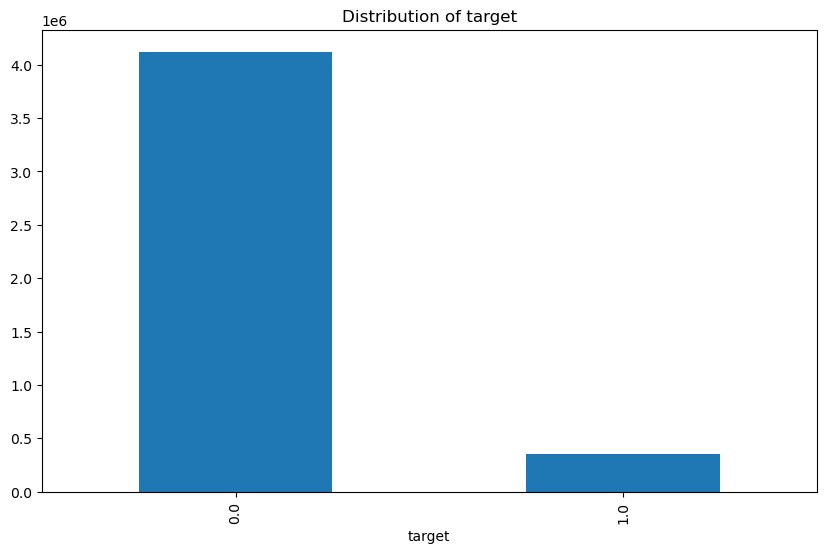

In [ ]:
# Intial EDA of fraud data

plt.figure(figsize=(10, 6))
train_data['target'].value_counts().plot(kind='bar')
plt.title('Distribution of target')
plt.show()

Here we added in some basic cleaning to map counter_type to binary values and rename disrict to district.

In [73]:
# Map counter_type to binary values
train_data['counter_type'] = train_data['counter_type'].map({'ELEC': 0, 'GAZ': 1})

# Rename disrict to district
train_data.rename(columns={'disrict': 'district'}, inplace=True)

## Inspecting the train dataset

While the invoice_train dataset comprises of columns with numerical values, they are actually categorical in nature. It is therefore important to dive into the possible encoded values that each column variable might take. This allows us to address certain assumptions we might have with our current understanding of these variables, or to make new assumptions as well.

From this initial inspection, we notice that:
- months_number: doesn't appear to be the month number of the invoice date as there are values > 12.
- counter_statue: based on the description, it's supposed to only take on 5 values but there are more than 5 types of values.
- counter_coefficient: based on the description, it's meant to be an additional coefficient to be added when standard consumption is exceeded. more investigation needed.
- counter_number: still unknown and it is not unique to a particular client id.
- counter_code: still unknown

In [37]:
# Identifying the no. of unique values in each column
print(f"{train_data['tarif_type'].nunique()} unique values in tarif column: ", train_data['tarif_type'].unique())
print(f"{train_data['counter_number'].nunique()} unique values in counter_number column: ", train_data['counter_number'].unique())
print(f"{train_data['counter_statue'].nunique()} unique values in counter_statue column: ", train_data['counter_statue'].unique())
print(f"{train_data['counter_code'].nunique()} unique values in counter_code column: ", train_data['counter_code'].unique())
print(f"{train_data['reading_remarque'].nunique()} unique values in reading_remarque column: ", train_data['reading_remarque'].unique())
print(f"{train_data['counter_coefficient'].nunique()} unique values in counter_coefficient column: ", train_data['counter_coefficient'].unique())
print(f"{train_data['months_number'].nunique()} unique values in months_number column: ", train_data['months_number'].unique())
print(f"{train_data['client_catg'].nunique()} unique values in client_catg column: ", train_data['client_catg'].unique())
print(f"{train_data['region'].nunique()} unique values in region column: ", train_data['region'].unique())

17 unique values in tarif column:  [11 40 15 10 12 14 13 45 29  9 30  8 21 42 27 18 24]
201893 unique values in counter_number column:  [1335667  678902  572765 ... 4811719  262195  560948]
12 unique values in counter_statue column:  [0 1 5 4 3 2 769 'A' 618 269375 46 420]
42 unique values in counter_code column:  [203 207 413   5 467 202 420 410  10 483  25 433 407 204 214 442 453 506
 450 403 333 201 102 305 210 101 532  40 310 565 600 307 303 222  65   0
 227 325  16 317 367   1]
8 unique values in reading_remarque column:  [  8   6   9   7 207 413 203   5]
16 unique values in counter_coefficient column:  [ 1  3  0 10  4 33 50 20  2  6 40  9 30  5 11  8]
1370 unique values in months_number column:  [     4     12      8 ... 367445 459733 463554]
3 unique values in client_catg column:  [11 12 51]
25 unique values in region column:  [101 107 301 105 303 103 309 311 304 104 312 305 306 308 372 307 313 310
 371 302 106 379 399 206 199]


### Inspecting months_number column

Since there was no description provided for months_number, our initial suspicions were that it was the difference between each reading for each client. However, that was not the case after doing a check on the invoice_dates. Furthermore, the boxplot of months_number is extremely skewed with majority of it having a value of 4, given by how up to at least 75% of the data is just 4. At this junction, months_number may not be meaningful for feature engineering. As to whether it is a useful feature for modelling, that will depend on modelling later on.

In [38]:
check_months_df = train_data.sort_values(["client_id", "invoice_date"])

# Ensure `invoice_date` is in datetime format & create a new column `year-month`
check_months_df['invoice_date'] = pd.to_datetime(check_months_df['invoice_date'])
check_months_df["year-month"] = check_months_df["invoice_date"].dt.to_period("M")

# Calculate the difference in months
check_months_df['month_diff'] = check_months_df.groupby("client_id")['year-month'].diff().apply(lambda x: x.n if pd.notnull(x) else None)

# Check if the difference in months is equal to the `months_number`
check_months_df["months_check"] = check_months_df["month_diff"] == check_months_df["months_number"]

print(f"No. of invoices with consistent months_number: {sum(check_months_df['months_check'])}/{len(check_months_df)}")

No. of invoices with consistent months_number: 1261920/4476738


Summary Statistics for months_number column:
count   4476738.00
mean         44.83
std        3128.34
min           0.00
25%           4.00
50%           4.00
75%           4.00
max      636624.00
Name: months_number, dtype: float64


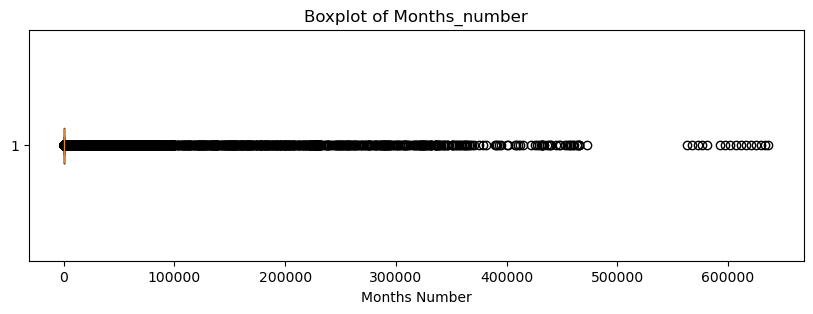

In [ ]:
# Disable scientific notation
pd.options.display.float_format = '{:.2f}'.format

# Print the description of the months_number column
print("Summary Statistics for months_number column:")
print(train_data["months_number"].describe())

# Plotting of boxplot
plt.figure(figsize=(10, 3))
plt.boxplot(train_data["months_number"].dropna(), vert=False)
plt.xlabel("Months Number")
plt.title("Boxplot of Months_number")
plt.show()

### Inspecting counter_statue column

Firstly, for the values that have entries in both strings and integers, we map them to integers. Afterwards, we  determine the no. of occurences of each counter_statue type.

In [40]:
# Converting the counter_statue numerical values to categorical values
train_data['counter_statue'] = train_data['counter_statue'].map({"0": 0, "5": 5, "1": 1, "4": 4}).fillna(train_data['counter_statue'])

# Identifying the no. of occurences of each counter_statue type
print(train_data['counter_statue'].value_counts())

counter_statue
0         4379008
1           74036
5           20628
4            2729
3             258
2              32
46             14
A              13
618            12
769             6
269375          1
420             1
Name: count, dtype: int64


Next, we look into the consumption levels of the clients with the alleged counter_statue anomalies (values above 5 as well as the value of 'A'). Only one client has occurences of counter_statue == A, and it shows a fixed old_index and new_index value of 3922. It might possibly mean an "on-hold" status, but due to the lack of information provided, we can remove these clients as they are non-fradulent readings, especially with how there are many fradulent data points.

In [52]:
# Identifying the no. of unique clients with counter_statue A
clients_with_counter_statue_A = train_data[(train_data['counter_statue'] == "A")]['client_id'].unique()
temp_df = train_data[train_data["client_id"].isin(clients_with_counter_statue_A)][['client_id', 'invoice_date','counter_statue', 'old_index', 'new_index', 'target']]

print("No. of data points that are fraudulent: ", temp_df['target'].sum())

display(temp_df.sort_values(["client_id", "invoice_date", "old_index"]).head(50))

No. of data points that are fraudulent:  0.0


,client_id,invoice_date,counter_statue,old_index,new_index,target
1923276,train_Client_30467,2005-09-12,A,3922,3972,0.00
1923230,train_Client_30467,2005-09-12,0.00,7724,7870,0.00
1923258,train_Client_30467,2005-09-12,0.00,37572,38325,0.00
1923240,train_Client_30467,2005-11-08,A,3922,3922,0.00
1923243,train_Client_30467,2005-11-08,0.00,7636,7724,0.00
1923250,train_Client_30467,2005-11-08,0.00,36775,37572,0.00
1923251,train_Client_30467,2006-04-18,A,3972,3972,0.00
1923252,train_Client_30467,2006-04-18,0.00,7870,8564,0.00
1923256,train_Client_30467,2006-04-18,0.00,38325,39227,0.00
1923267,train_Client_30467,2006-08-14,A,3972,3972,0.00


There are 5 clients with occurences of counter_state > 5, and it shows a fixed old_index of 0. It is unclear what this might mean, but due to the lack of information provided, we can remove these clients as well since as they are non-fradulent readings, especially with how there are many other fradulent data points.

In [53]:
# Firstly remove rows with counter_statue = 'A' and then find the clients with counter_statue more than 5
clients_with_counter_statue_more_than_5 = invoice_train[(invoice_train['counter_statue'] != "A")]
clients_with_counter_statue_more_than_5 = clients_with_counter_statue_more_than_5[(clients_with_counter_statue_more_than_5['counter_statue'] > 5)]['client_id'].unique()

print(f"No. of clients containing counter_statue more than 5: {len(clients_with_counter_statue_more_than_5)}")

temp_df = train_data[train_data["client_id"].isin(clients_with_counter_statue_more_than_5)][['client_id', 'invoice_date','counter_statue', 'old_index', 'new_index', 'target']]

print("No. of data points that are fraudulent: ", temp_df['target'].sum())

display(temp_df.sort_values(["client_id", "invoice_date", "old_index"]).head(50))

No. of clients containing counter_statue more than 5: 5
No. of data points that are fraudulent:  0.0


,client_id,invoice_date,counter_statue,old_index,new_index,target
1178213,train_Client_13203,2010-03-24,1,0,126,0.00
1178214,train_Client_13203,2010-03-24,769,0,0,0.00
1178212,train_Client_13203,2010-05-21,5,126,126,0.00
1178211,train_Client_13203,2010-07-19,769,0,332,0.00
1178210,train_Client_13203,2010-07-19,0,126,178,0.00
1178200,train_Client_13203,2010-11-19,769,0,717,0.00
1178199,train_Client_13203,2010-11-19,0,178,220,0.00
1178209,train_Client_13203,2011-03-29,769,0,1196,0.00
1178208,train_Client_13203,2011-03-29,0,220,335,0.00
1178207,train_Client_13203,2011-07-21,769,0,1633,0.00


## Identifying any potential perfectly correlated variables

Any variables or values that are perfectly correlated will not add information to model building, and is considered redundant. Reducing these redundant features can help reduce dimensionality as well as prevent potential overfitting due to data leakage in the model building process.

In [77]:
# Filtering for the numerical data
numerical_columns = ['counter_number', 'consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'consommation_level_4', 'old_index', 'new_index', 'months_number']

# Filtering for the categorical data
categorical_columns = ['tarif_type', 'counter_statue', 'counter_code', 'reading_remarque', 'counter_coefficient', 'counter_type', 'district', 'client_catg', 'region']

### Numerical variables against Numerical variables

In [78]:
# Pearson
corr_pearson = train_data[numerical_columns].corr(method='pearson')

# Spearman
corr_spearman = train_data[numerical_columns].corr(method='spearman')

# Kendall Tau
corr_kendall = train_data[numerical_columns].corr(method='kendall')

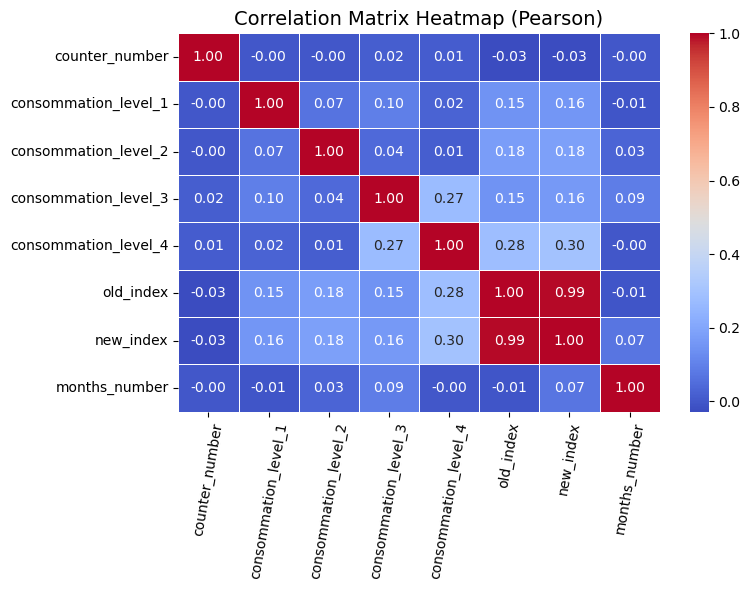

In [68]:
# Assuming corr_pearson is your correlation matrix
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

# Create the heatmap
heatmap = sns.heatmap(
    corr_pearson,
    annot=True,  # Show correlation values
    fmt=".2f",   # Format the correlation values to 2 decimal places
    cmap="coolwarm",  # Color scheme
    linewidths=0.5,  # Add lines between cells
    cbar=True  # Show the color bar
)

# Add title and adjust label font sizes
plt.title('Correlation Matrix Heatmap (Pearson)', fontsize=14)
plt.xticks(fontsize=10, rotation=80)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()  # Automatically adjust layout to prevent overlap

plt.show()

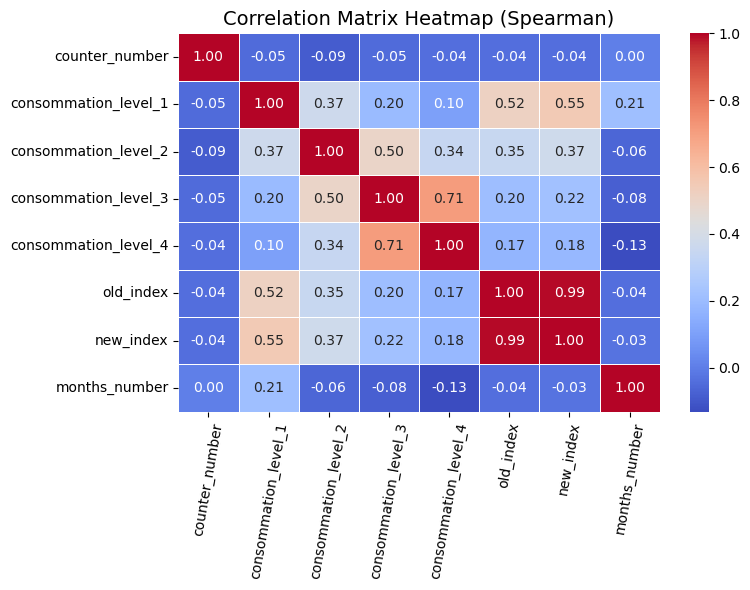

In [69]:
# Assuming corr_pearson is your correlation matrix
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

# Create the heatmap
heatmap = sns.heatmap(
    corr_spearman,
    annot=True,  # Show correlation values
    fmt=".2f",   # Format the correlation values to 2 decimal places
    cmap="coolwarm",  # Color scheme
    linewidths=0.5,  # Add lines between cells
    cbar=True  # Show the color bar
)

# Add title and adjust label font sizes
plt.title('Correlation Matrix Heatmap (Spearman)', fontsize=14)
plt.xticks(fontsize=10, rotation=80)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()  # Automatically adjust layout to prevent overlap

plt.show()

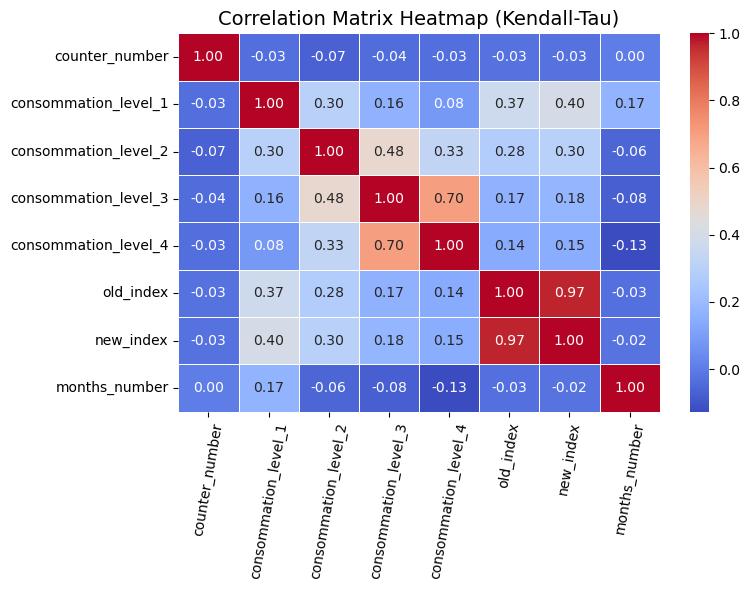

In [70]:
# Assuming corr_pearson is your correlation matrix
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

# Create the heatmap
heatmap = sns.heatmap(
    corr_kendall,
    annot=True,  # Show correlation values
    fmt=".2f",   # Format the correlation values to 2 decimal places
    cmap="coolwarm",  # Color scheme
    linewidths=0.5,  # Add lines between cells
    cbar=True  # Show the color bar
)

# Add title and adjust label font sizes
plt.title('Correlation Matrix Heatmap (Kendall-Tau)', fontsize=14)
plt.xticks(fontsize=10, rotation=80)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()  # Automatically adjust layout to prevent overlap

plt.show()

### Numerical variables against Categorical variables [in progress]

In [ ]:
from scipy.stats import f_oneway

# Example: Check relationship between 'numerical_col' and 'categorical_col'
groups = [train_data['numerica'][categorical_df == category] for category in categorical_df.unique()]
f_stat, p_value = f_oneway(*groups)
print(f"F-statistic: {f_stat}, P-value: {p_value}")


AttributeError: 'DataFrame' object has no attribute 'unique'